<a href="https://colab.research.google.com/github/Jadesola3/SRMP/blob/main/10_features_for_star_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./Gaia_Prot_cmatch.csv')
len(df)

94064

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'parallax')

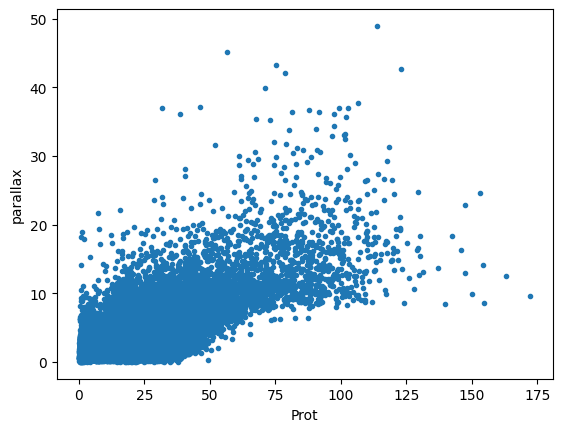

In [ ]:
plt.plot(df['Prot'], df['parallax'], '.')
plt.xlabel('Prot')
plt.ylabel('parallax')

Text(0, 0.5, 'pmra')

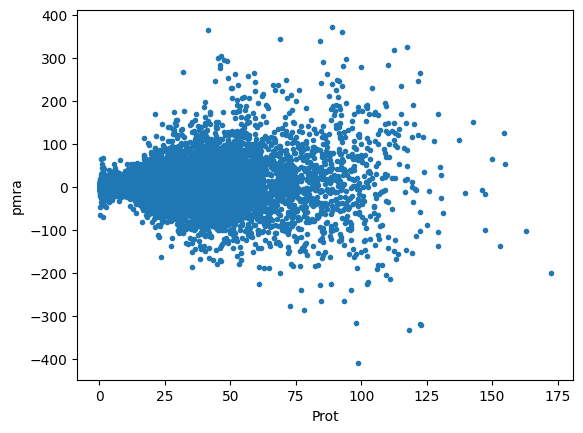

In [ ]:
plt.plot(df['Prot'], df['pmra'], '.')
plt.xlabel('Prot')
plt.ylabel('pmra')

Text(0, 0.5, 'teff_calc')

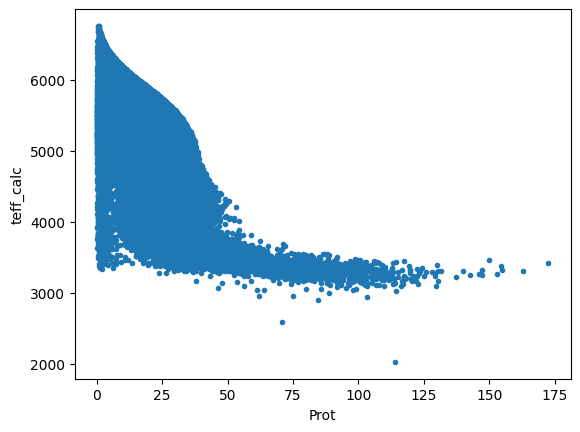

In [ ]:
plt.plot(df['Prot'], df['teff_calc'], '.')
plt.xlabel('Prot')
plt.ylabel('teff_calc')

Text(0, 0.5, 'abs_G')

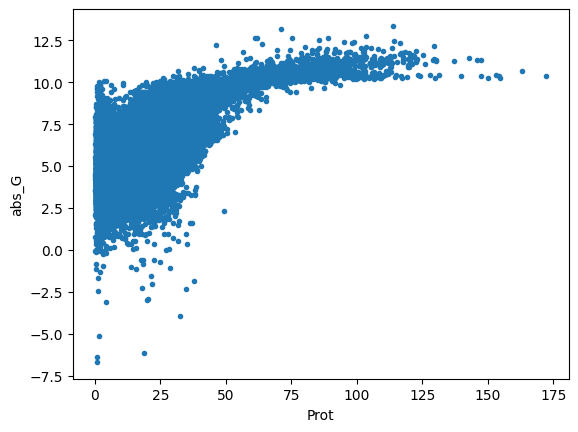

In [ ]:
plt.plot(df['Prot'], df['abs_G'], '.')
plt.xlabel('Prot')
plt.ylabel('abs_G')

Text(0, 0.5, 'phot_bp_mean_mag')

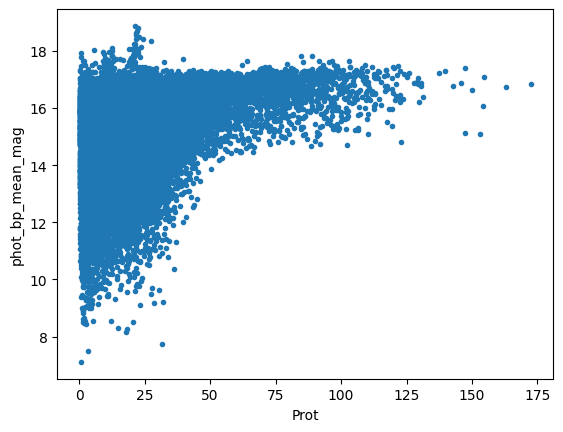

In [ ]:
plt.plot(df['Prot'], df['phot_bp_mean_mag'], '.')
plt.xlabel('Prot')
plt.ylabel('phot_bp_mean_mag')

Text(0, 0.5, 'g_rp')

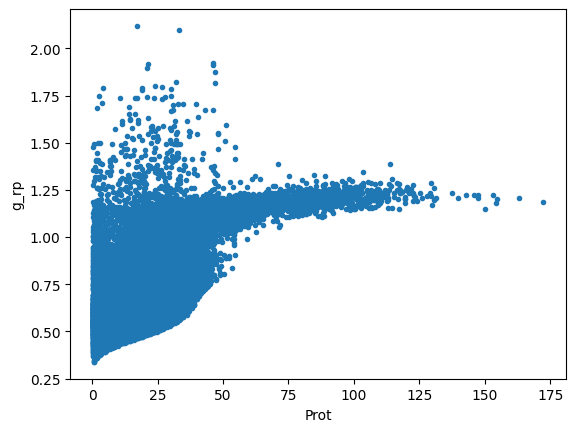

In [ ]:
plt.plot(df['Prot'], df['g_rp'], '.')
plt.xlabel('Prot')
plt.ylabel('g_rp')

Text(0, 0.5, 'bp_g')

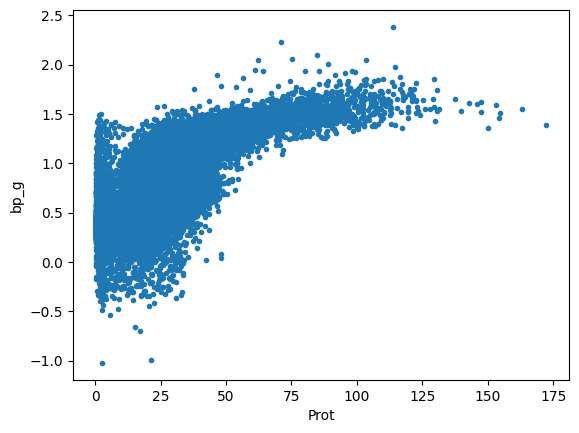

In [ ]:
plt.plot(df['Prot'], df['bp_g'], '.')
plt.xlabel('Prot')
plt.ylabel('bp_g')


Text(0, 0.5, 'nu_eff_used_in_astrometry')

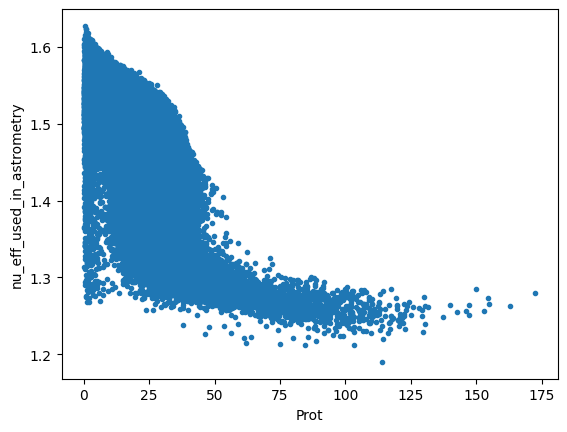

In [ ]:
plt.plot(df['Prot'], df['nu_eff_used_in_astrometry'], '.')
plt.xlabel('Prot')
plt.ylabel('nu_eff_used_in_astrometry')

Text(0, 0.5, 'ra_dec_corr')

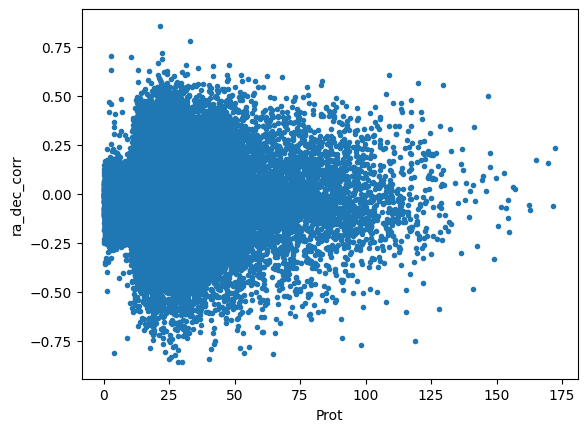

In [ ]:
plt.plot(df['Prot'], df['ra_dec_corr'], '.')
plt.xlabel('Prot')
plt.ylabel('ra_dec_corr')

Text(0, 0.5, 'pmdec')

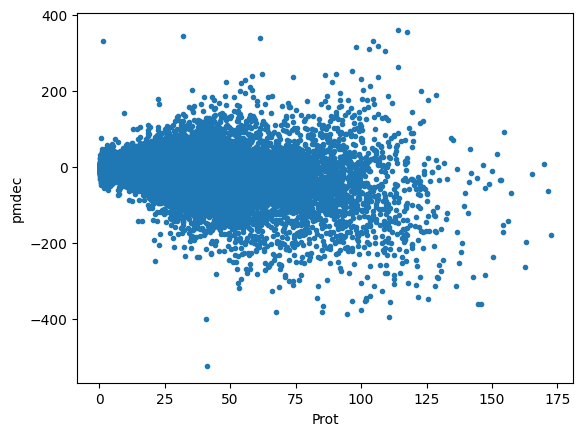

In [ ]:
plt.plot(df['Prot'], df['pmdec'], '.')
plt.xlabel('Prot')
plt.ylabel('pmdec')

linear relationships between the 10 features::

In [ ]:
import numpy as np

In [ ]:
def train(y, X):
    """

    Args:
        y (array): An Nstar array of rotation periods.
        X (array): An Nstar x NX array of features.

    Returns:
        weights (array): The array of weights of length NX + 1.

    """
    A = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Shape: Nstars x Nfeatures (incl crossterms)
    AT = A.T
    ATA = np.dot(AT, A)

    weights = np.linalg.solve(ATA, np.dot(AT, y))
    return weights

def normalize(x):
    return (x-min(x))/(max(x)-min(x))

In [ ]:
features = [df['parallax'], df['pmra'], df["abs_G"], df["phot_bp_mean_mag"], df["g_rp"], df["bp_g"],\
            df["nu_eff_used_in_astrometry"],  df["ra_dec_corr"]]

m = np.isfinite (df['parallax'].values)
for f in features[1:]:
  m &= np.isfinite(f.values)
df= df.iloc[m]
print(np.shape(df), np.shape(df))

(91943, 103) (91943, 103)


In [ ]:
y = df.Prot.values

In [ ]:
from itertools import combinations_with_replacement

args =normalize(df['parallax']), normalize(df['pmra']) ,\
normalize(df["abs_G"]), normalize(df["phot_bp_mean_mag"]), normalize(df["g_rp"]),\
normalize(df["bp_g"]),normalize(df["nu_eff_used_in_astrometry"]),normalize(df["ra_dec_corr"])
X = list(args)

X = np.array(X).T

names = ['parallax','pmra','abs_G', 'phot_bp_mean_mag', 'g_rp', 'bp_g', 'nu_eff', 'ra_dec', ]
X_names = list(names)

X_names = np.array(X_names).T

print(np.shape(X), len(args), len(names))

(91943, 8) 8 8


In [ ]:
# Define the number of training and validating stars.
Ntrain = int(0.8*len(y))

# Choose stars at random and split.
shuffle_inds = np.arange(len(y))
np.random.shuffle(shuffle_inds)
train_inds = shuffle_inds[:Ntrain]
test_inds = shuffle_inds[Ntrain:]
y_train, X_train = y[train_inds], X[train_inds, :]
y_test, X_test = y[test_inds], X[test_inds, :]


In [ ]:
weights = train(y_train, X_train)

In [ ]:
A = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
y_predict = np.dot(weights.T, A.T)

Text(0, 0.5, 'predicted period[Days]')

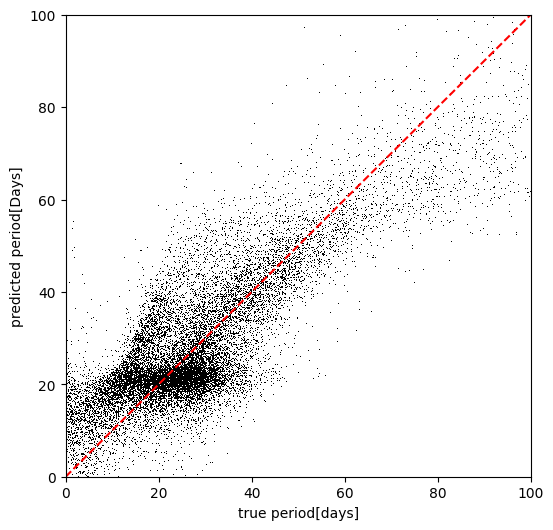

In [ ]:
import matplotlib.pyplot as plt
xs = np.linspace(0, 100, 10)

plt.figure(figsize =(6,6), dpi=100)
plt.plot(y_test, y_predict.T, "k,")
plt.plot(xs, xs, "r--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel ("true period[days]")
plt.ylabel ("predicted period[Days]")

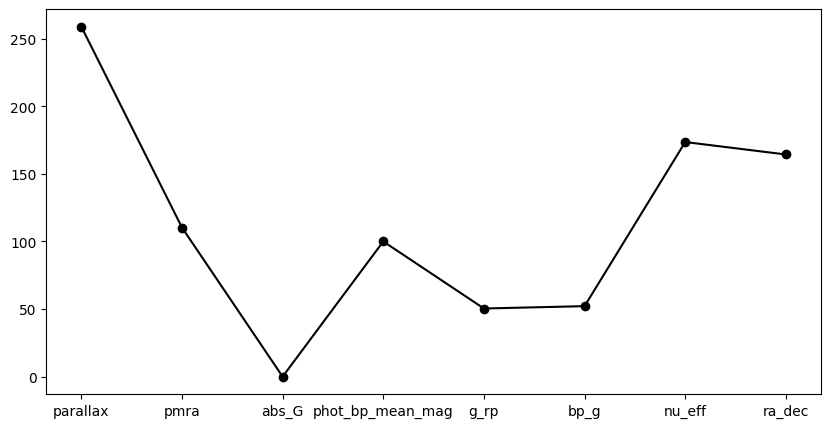

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_names, abs(weights[:-1]), 'k-o')

In [ ]:
m = (y_test < 20)

In [ ]:
p_test, p_pre = (y_test[m]), y_predict.T[m]

In [ ]:
bias = np.mean(p_pre - p_test)
print(bias)

6.158549455796733


In [ ]:
p_test, p_pre = (y_test[m]), y_predict.T[m]

In [ ]:
m = (y_test > 50)

In [ ]:
p_test, p_pre = (y_test[m]), y_predict.T[m]

In [ ]:
bias = np.mean(p_pre - p_test)
print(bias)

-11.271314751466006


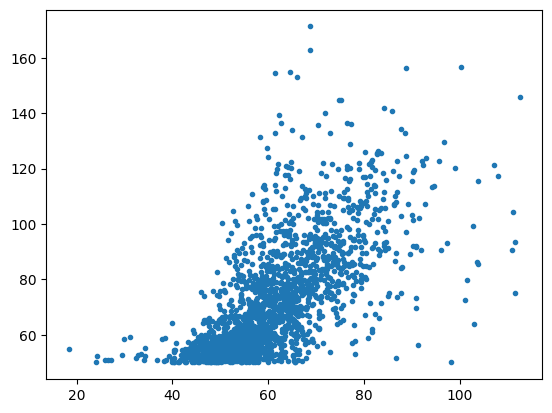

In [ ]:
plt.plot(p_pre, p_test, '.')

In [ ]:
p_test, p_pre = (y_test), y_predict.T

In [ ]:
bias = np.mean(p_pre - p_test)
print(bias)

6.158549455796733


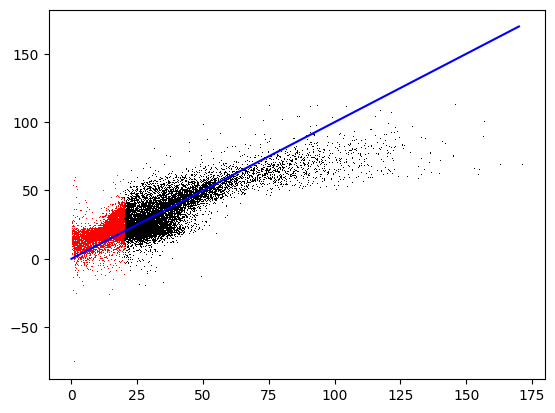

In [ ]:
m = (y_test < 20)
p_pre, p_test = y_predict[m], y_test[m]

plt.plot( y_test, y_predict, 'k,')
plt.plot( p_test, p_pre, 'r,')
plt.plot([0,170], [0,170], 'b-')

In [ ]:
def bias(predict, true):
    b = np.mean(predict-true)
    return b

In [ ]:
b = bias(p_pre, p_test)
print(b)

6.158549455796733


In [ ]:
def var(pred, true):
    v = np.sqrt(sum((pred-true)**2))
    return v

In [ ]:
v = var(p_pre, p_test)
print (v/len(p_pre))

0.12473852751944249


In [ ]:
m = (y_test > 50)

In [ ]:
p_test, p_pre = (y_test[m]), y_predict.T[m]

In [ ]:
v = var(p_pre, p_test)
print (v/len(p_pre))

0.4346893507257303


In [ ]:
m = (y_test < 20)

In [ ]:
p_test, p_pre = (y_test[m]), y_predict.T[m]

In [ ]:
v = var(p_pre, p_test)
print (v/len(p_pre))

0.12473852751944249
